In [2]:
import pandas as pd
import seaborn as sns

In [3]:
tips =  pd.read_csv("tips.csv")

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
69,15.01,2.09,Male,Yes,Sat,Dinner,2
217,11.59,1.50,Male,Yes,Sat,Dinner,2
105,15.36,1.64,Male,Yes,Sat,Dinner,2
189,23.10,4.00,Male,Yes,Sun,Dinner,3
203,16.40,2.50,Female,Yes,Thur,Lunch,2


In [5]:
tips.nlargest(5,'tip')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


In [6]:
(tips.tip / tips.total_bill).mean()

0.16080258172250472

In [7]:
(tips.tip / tips.total_bill).sort_values(ascending=False).head(10)

172    0.710345
178    0.416667
67     0.325733
232    0.291990
183    0.280535
109    0.279525
149    0.266312
93     0.263480
221    0.259314
51     0.252672
dtype: float64

In [8]:
tips.shape

(244, 7)

In [9]:
tips['total_bill'].sum()

4827.77

In [10]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
day_group = tips.groupby('day')

In [56]:
day_group.sum(numeric_only = True)

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [13]:
day_group[['total_bill','tip']].sum()

,total_bill,tip
day,,
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39
Thur,1096.33,171.83


In [14]:
tips.groupby('sex')[['total_bill','tip']].mean()

,total_bill,tip
sex,,
Female,18.056897,2.833448
Male,20.744076,3.089618


In [15]:
tips['tip_per'] = tips['tip'] / tips['total_bill'] * 100

In [16]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_per
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [17]:
tips.groupby('sex')['tip_per'].mean()

sex
Female    16.649074
Male      15.765055
Name: tip_per, dtype: float64

In [18]:
tips.sort_values(by='tip_per', ascending=False).head()                 

,total_bill,tip,sex,smoker,day,time,size,tip_per
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517


In [19]:
tips.groupby('day')[['total_bill','tip']].agg(['mean','sum','max'])

total_bill                       tip               
           mean      sum    max      mean     sum    max
day                                                     
Fri   17.151579   325.88  40.17  2.734737   51.96   4.73
Sat   20.441379  1778.40  50.81  2.993103  260.40  10.00
Sun   21.410000  1627.16  48.17  3.255132  247.39   6.50
Thur  17.682742  1096.33  43.11  2.771452  171.83   6.70

In [20]:
tips.groupby(['smoker','day'])[ ['total_bill','tip']].sum()

total_bill     tip
smoker day                     
No     Fri        73.68   11.25
       Sat       884.78  139.63
       Sun      1168.88  180.57
       Thur      770.09  120.32
Yes    Fri       252.20   40.71
       Sat       893.62  120.77
       Sun       458.28   66.82
       Thur      326.24   51.51

In [21]:
tips.groupby(['smoker','day'], as_index=False)[ ['total_bill','tip']].sum()

,smoker,day,total_bill,tip
0,No,Fri,73.68,11.25
1,No,Sat,884.78,139.63
2,No,Sun,1168.88,180.57
3,No,Thur,770.09,120.32
4,Yes,Fri,252.20,40.71
5,Yes,Sat,893.62,120.77
6,Yes,Sun,458.28,66.82
7,Yes,Thur,326.24,51.51


In [22]:
tips.groupby(['day','smoker','sex'])[['total_bill','tip']].agg(['sum','mean'])

total_bill                tip          
                          sum       mean     sum      mean
day  smoker sex                                           
Fri  No     Female      38.73  19.365000    6.25  3.125000
            Male        34.95  17.475000    5.00  2.500000
     Yes    Female      88.58  12.654286   18.78  2.682857
            Male       163.62  20.452500   21.93  2.741250
Sat  No     Female     247.05  19.003846   35.42  2.724615
            Male       637.73  19.929063  104.21  3.256563
     Yes    Female     304.00  20.266667   43.03  2.868667
            Male       589.62  21.837778   77.74  2.879259
Sun  No     Female     291.54  20.824286   46.61  3.329286
            Male       877.34  20.403256  133.96  3.115349
     Yes    Female      66.16  16.540000   14.00  3.500000
            Male       392.12  26.141333   52.82  3.521333
Thur No     Female     400.36  16.014400   61.49  2.459600
            Male       369.73  18.486500   58.83  2.941500
     Yes    Female     134.53  19.218571   20.93  2.990000
            Male       191.71  19.171000   30.58  3.058000

In [23]:
tips.groupby(['day','smoker'])[['total_bill','tip']].agg({'total_bill' : 'sum','tip' :'mean'})

total_bill       tip
day  smoker                      
Fri  No           73.68  2.812500
     Yes         252.20  2.714000
Sat  No          884.78  3.102889
     Yes         893.62  2.875476
Sun  No         1168.88  3.167895
     Yes         458.28  3.516842
Thur No          770.09  2.673778
     Yes         326.24  3.030000

In [24]:
day_groups = tips.groupby('day')

In [25]:
for day,rows in day_groups:
    print(day)
    print(rows.sort_values('total_bill', ascending=False).head(3))  # Top 3 transactions 

Fri
    total_bill   tip   sex smoker  day    time  size    tip_per
95       40.17  4.73  Male    Yes  Fri  Dinner     4  11.774956
90       28.97  3.00  Male    Yes  Fri  Dinner     2  10.355540
96       27.28  4.00  Male    Yes  Fri  Dinner     2  14.662757
Sat
     total_bill    tip   sex smoker  day    time  size    tip_per
170       50.81  10.00  Male    Yes  Sat  Dinner     3  19.681165
212       48.33   9.00  Male     No  Sat  Dinner     4  18.621974
59        48.27   6.73  Male     No  Sat  Dinner     4  13.942407
Sun
     total_bill  tip   sex smoker  day    time  size    tip_per
156       48.17  5.0  Male     No  Sun  Dinner     6  10.379905
182       45.35  3.5  Male    Yes  Sun  Dinner     3   7.717751
184       40.55  3.0  Male    Yes  Sun  Dinner     2   7.398274
Thur
     total_bill   tip     sex smoker   day   time  size    tip_per
197       43.11  5.00  Female    Yes  Thur  Lunch     4  11.598237
142       41.19  5.00    Male     No  Thur  Lunch     5  12.138869
85    

In [57]:
summary = tips.groupby(['day','time']).sum(numeric_only = True)

In [58]:
summary.index

MultiIndex([( 'Fri', 'Dinner'),
            ( 'Fri',  'Lunch'),
            ( 'Sat', 'Dinner'),
            ( 'Sun', 'Dinner'),
            ('Thur', 'Dinner'),
            ('Thur',  'Lunch')],
           names=['day', 'time'])

In [59]:
summary

total_bill     tip  size      tip_per
day  time                                         
Fri  Dinner      235.96   35.28    26   190.699333
     Lunch        89.92   16.68    14   132.135422
Sat  Dinner     1778.40  260.40   219  1332.419933
Sun  Dinner     1627.16  247.39   216  1268.419376
Thur Dinner       18.78    3.00     2    15.974441
     Lunch      1077.55  168.83   150   983.934490

In [60]:
summary  = tips.groupby(['day','time'], as_index=False).sum(numeric_only = True)

In [61]:
summary

,day,time,total_bill,tip,size,tip_per
0,Fri,Dinner,235.96,35.28,26,190.699333
1,Fri,Lunch,89.92,16.68,14,132.135422
2,Sat,Dinner,1778.40,260.40,219,1332.419933
3,Sun,Dinner,1627.16,247.39,216,1268.419376
4,Thur,Dinner,18.78,3.00,2,15.974441
5,Thur,Lunch,1077.55,168.83,150,983.934490


In [31]:
summary.loc[(summary.day == 'Fri') & (summary.time == 'Dinner'), 'total_bill']

0    235.96
Name: total_bill, dtype: float64

#### Pivot Table

In [32]:
tips.pivot_table(values = 'total_bill', index='day', columns='time')

time,Dinner,Lunch
day,,
Fri,19.663333,12.845714
Sat,20.441379,NaN
Sun,21.410000,NaN
Thur,18.780000,17.664754


In [33]:
tips.pivot_table(values = 'total_bill', index='day', columns='sex', aggfunc=['sum','mean'])

sum                mean           
sex   Female     Male     Female       Male
day                                        
Fri   127.31   198.57  14.145556  19.857000
Sat   551.05  1227.35  19.680357  20.802542
Sun   357.70  1269.46  19.872222  21.887241
Thur  534.89   561.44  16.715312  18.714667

In [34]:
tips.pivot_table(values = 'total_bill', index='day', columns=['time','smoker'], aggfunc='sum')

time     Dinner           Lunch        
smoker       No     Yes      No     Yes
day                                    
Fri       57.70  178.26   15.98   73.94
Sat      884.78  893.62     NaN     NaN
Sun     1168.88  458.28     NaN     NaN
Thur      18.78     NaN  751.31  326.24

In [35]:
# Margins is about summaries 
tips.pivot_table(values = 'total_bill', index='day', columns=['smoker'], aggfunc='sum', margins=True)

smoker,No,Yes,All
day,,,
Fri,73.68,252.20,325.88
Sat,884.78,893.62,1778.40
Sun,1168.88,458.28,1627.16
Thur,770.09,326.24,1096.33
All,2897.43,1930.34,4827.77


### get_dummies()

In [5]:
pd.get_dummies( tips[['smoker','day']])  # one-hot encoding

,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,True,False,False,False,True,False
1,True,False,False,False,True,False
2,True,False,False,False,True,False
3,True,False,False,False,True,False
4,True,False,False,False,True,False
...,...,...,...,...,...,...
239,True,False,False,True,False,False
240,False,True,False,True,False,False
241,False,True,False,True,False,False
242,True,False,False,True,False,False


### Binning

In [37]:
tips['bill_bin'] = pd.cut(tips.total_bill,5)

In [38]:
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,"(12.618, 22.166]"
1,10.34,"(3.022, 12.618]"
2,21.01,"(12.618, 22.166]"
3,23.68,"(22.166, 31.714]"
4,24.59,"(22.166, 31.714]"
...,...,...
239,29.03,"(22.166, 31.714]"
240,27.18,"(22.166, 31.714]"
241,22.67,"(22.166, 31.714]"
242,17.82,"(12.618, 22.166]"


In [39]:
tips['bill_bin'] = pd.cut(tips.total_bill, bins=[0,10,30,50,100])
tips[['total_bill','bill_bin']].sample(5)

,total_bill,bill_bin
72,26.86,"(10, 30]"
145,8.35,"(0, 10]"
170,50.81,"(50, 100]"
41,17.46,"(10, 30]"
95,40.17,"(30, 50]"


In [40]:
tips['bill_bin'].value_counts()

bill_bin
(10, 30]     195
(30, 50]      31
(0, 10]       17
(50, 100]      1
Name: count, dtype: int64

In [41]:
tips['bill_bin'] = pd.cut(tips.total_bill,bins=[0,10,20,40,100],
                          labels=['Low','Medium','High','Very High'])
tips[['total_bill','bill_bin']]

,total_bill,bill_bin
0,16.99,Medium
1,10.34,Medium
2,21.01,High
3,23.68,High
4,24.59,High
...,...,...
239,29.03,High
240,27.18,High
241,22.67,High
242,17.82,Medium


In [42]:
tips['bill_bin'].value_counts()

bill_bin
Medium       130
High          87
Low           17
Very High     10
Name: count, dtype: int64

In [43]:
pd.qcut(tips['total_bill'], [0,.25,.75,1], labels=['LQ','IQR','UQ'])

0      IQR
1       LQ
2      IQR
3      IQR
4       UQ
      ... 
239     UQ
240     UQ
241    IQR
242    IQR
243    IQR
Name: total_bill, Length: 244, dtype: category
Categories (3, object): ['LQ' < 'IQR' < 'UQ']

In [44]:
bins, intervals = pd.cut(tips.total_bill,bins=5,retbins=True)                          

In [45]:
intervals

array([ 3.02226, 12.618  , 22.166  , 31.714  , 41.262  , 50.81   ])

### Plotting 

<Axes: title={'center': 'Total Bill By Day'}, xlabel='day', ylabel='Amount'>

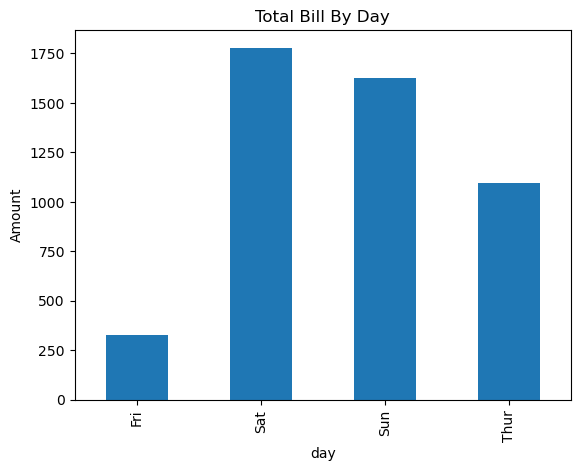

In [46]:
day_total = tips.groupby("day")['total_bill'].sum()
#print(day_total)
day_total.plot(kind='bar', ylabel = "Amount", title = "Total Bill By Day")

<Axes: ylabel='tip'>

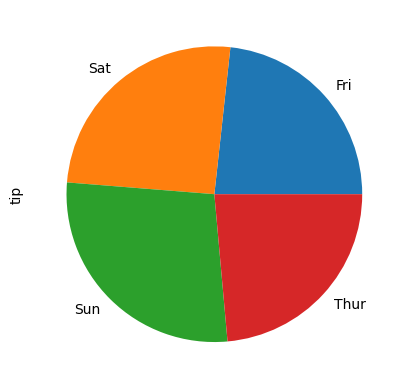

In [47]:
day_total = tips.groupby("day")['tip'].mean()
day_total.plot(kind = 'pie')

In [48]:
totals = tips.groupby(["day",'sex'])['total_bill'].sum()
totals

day   sex   
Fri   Female     127.31
      Male       198.57
Sat   Female     551.05
      Male      1227.35
Sun   Female     357.70
      Male      1269.46
Thur  Female     534.89
      Male       561.44
Name: total_bill, dtype: float64

<Axes: xlabel='day,sex'>

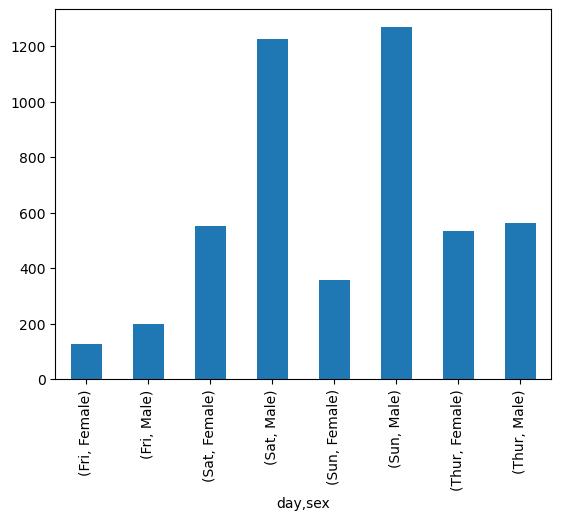

In [49]:
totals.plot.bar()

In [50]:
day_total = tips.pivot_table(index='day',columns='sex',values=['total_bill'],aggfunc='sum')

In [51]:
day_total

total_bill         
sex      Female     Male
day                     
Fri      127.31   198.57
Sat      551.05  1227.35
Sun      357.70  1269.46
Thur     534.89   561.44

In [52]:
day_total.columns = ['Male','Female']
day_total

,Male,Female
day,,
Fri,127.31,198.57
Sat,551.05,1227.35
Sun,357.70,1269.46
Thur,534.89,561.44


<Axes: xlabel='day'>

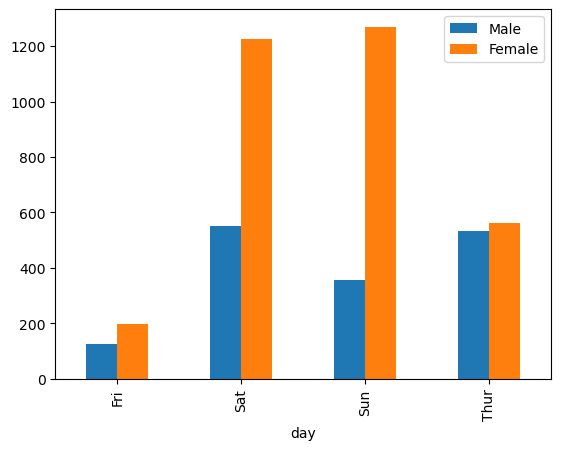

In [53]:
day_total.plot.bar()

<Axes: xlabel='sex'>

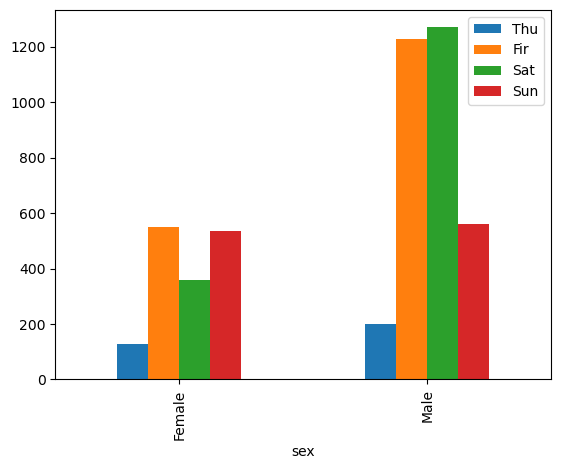

In [54]:
gender_total = tips.pivot_table(index='sex',columns='day',values=['total_bill'],aggfunc='sum')
gender_total.columns = ["Thu",'Fir','Sat','Sun']
gender_total.plot.bar()
#print(gender_total)